In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape') 
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape


(8760, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
parts = df["Date"].str.split("-", n=3, expand=True) 
df["Day"] = parts[0].astype('int') 
df["Month"] = parts[1].astype('int') 
df["Year"] = parts[2].astype('int') 
df.head() 


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [8]:
from datetime import datetime 
import calendar 


def weekend_or_weekday(Year, Month, Day): 

	d = datetime(Year, Month, Day) 
	if d.weekday() > 4: 
		return 0
	else: 
		return 1


df['Weekday'] = df.apply(lambda x: weekend_or_weekday(x['Year'], x['Month'], x['Day']), axis=1) 
df.head() 


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1


In [9]:
def am_or_pm(x): 
	if x > 11: 
		return 1
	else: 
		return 0


df['am_or_pm'] = df['Hour'].apply(am_or_pm) 
df.head() 


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday,am_or_pm
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,1,0


In [10]:
# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Seasons'])

# printing label
label


array([3, 3, 3, ..., 0, 0, 0])

In [11]:
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("Seasons", axis=1, inplace=True)

# Appending the array to our dataFrame 
# with column name 'Purchased'
df["Seasons"] = label

# printing Dataframe
df



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Weekday,am_or_pm,Seasons
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,12,2017,1,0,3
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,12,2017,1,0,3
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,1,12,2017,1,0,3
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,12,2017,1,0,3
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,1,12,2017,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,30,11,2018,1,1,0
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,30,11,2018,1,1,0
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,30,11,2018,1,1,0
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,30,11,2018,1,1,0


In [12]:
label = le.fit_transform(df['Holiday'])
label



array([1, 1, 1, ..., 1, 1, 1])

In [13]:
df.drop("Holiday", axis=1, inplace=True)
df["Holiday"] = label
df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Day,Month,Year,Weekday,am_or_pm,Seasons,Holiday
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes,1,12,2017,1,0,3,1
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes,1,12,2017,1,0,3,1
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes,1,12,2017,1,0,3,1
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes,1,12,2017,1,0,3,1
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes,1,12,2017,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes,30,11,2018,1,1,0,1
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes,30,11,2018,1,1,0,1
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes,30,11,2018,1,1,0,1
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes,30,11,2018,1,1,0,1


In [14]:
df.drop(['Date','Functioning Day'], 
		axis=1, 
		inplace=True) 


In [15]:
df.isnull().sum()


Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Day                          0
Month                        0
Year                         0
Weekday                      0
am_or_pm                     0
Seasons                      0
Holiday                      0
dtype: int64

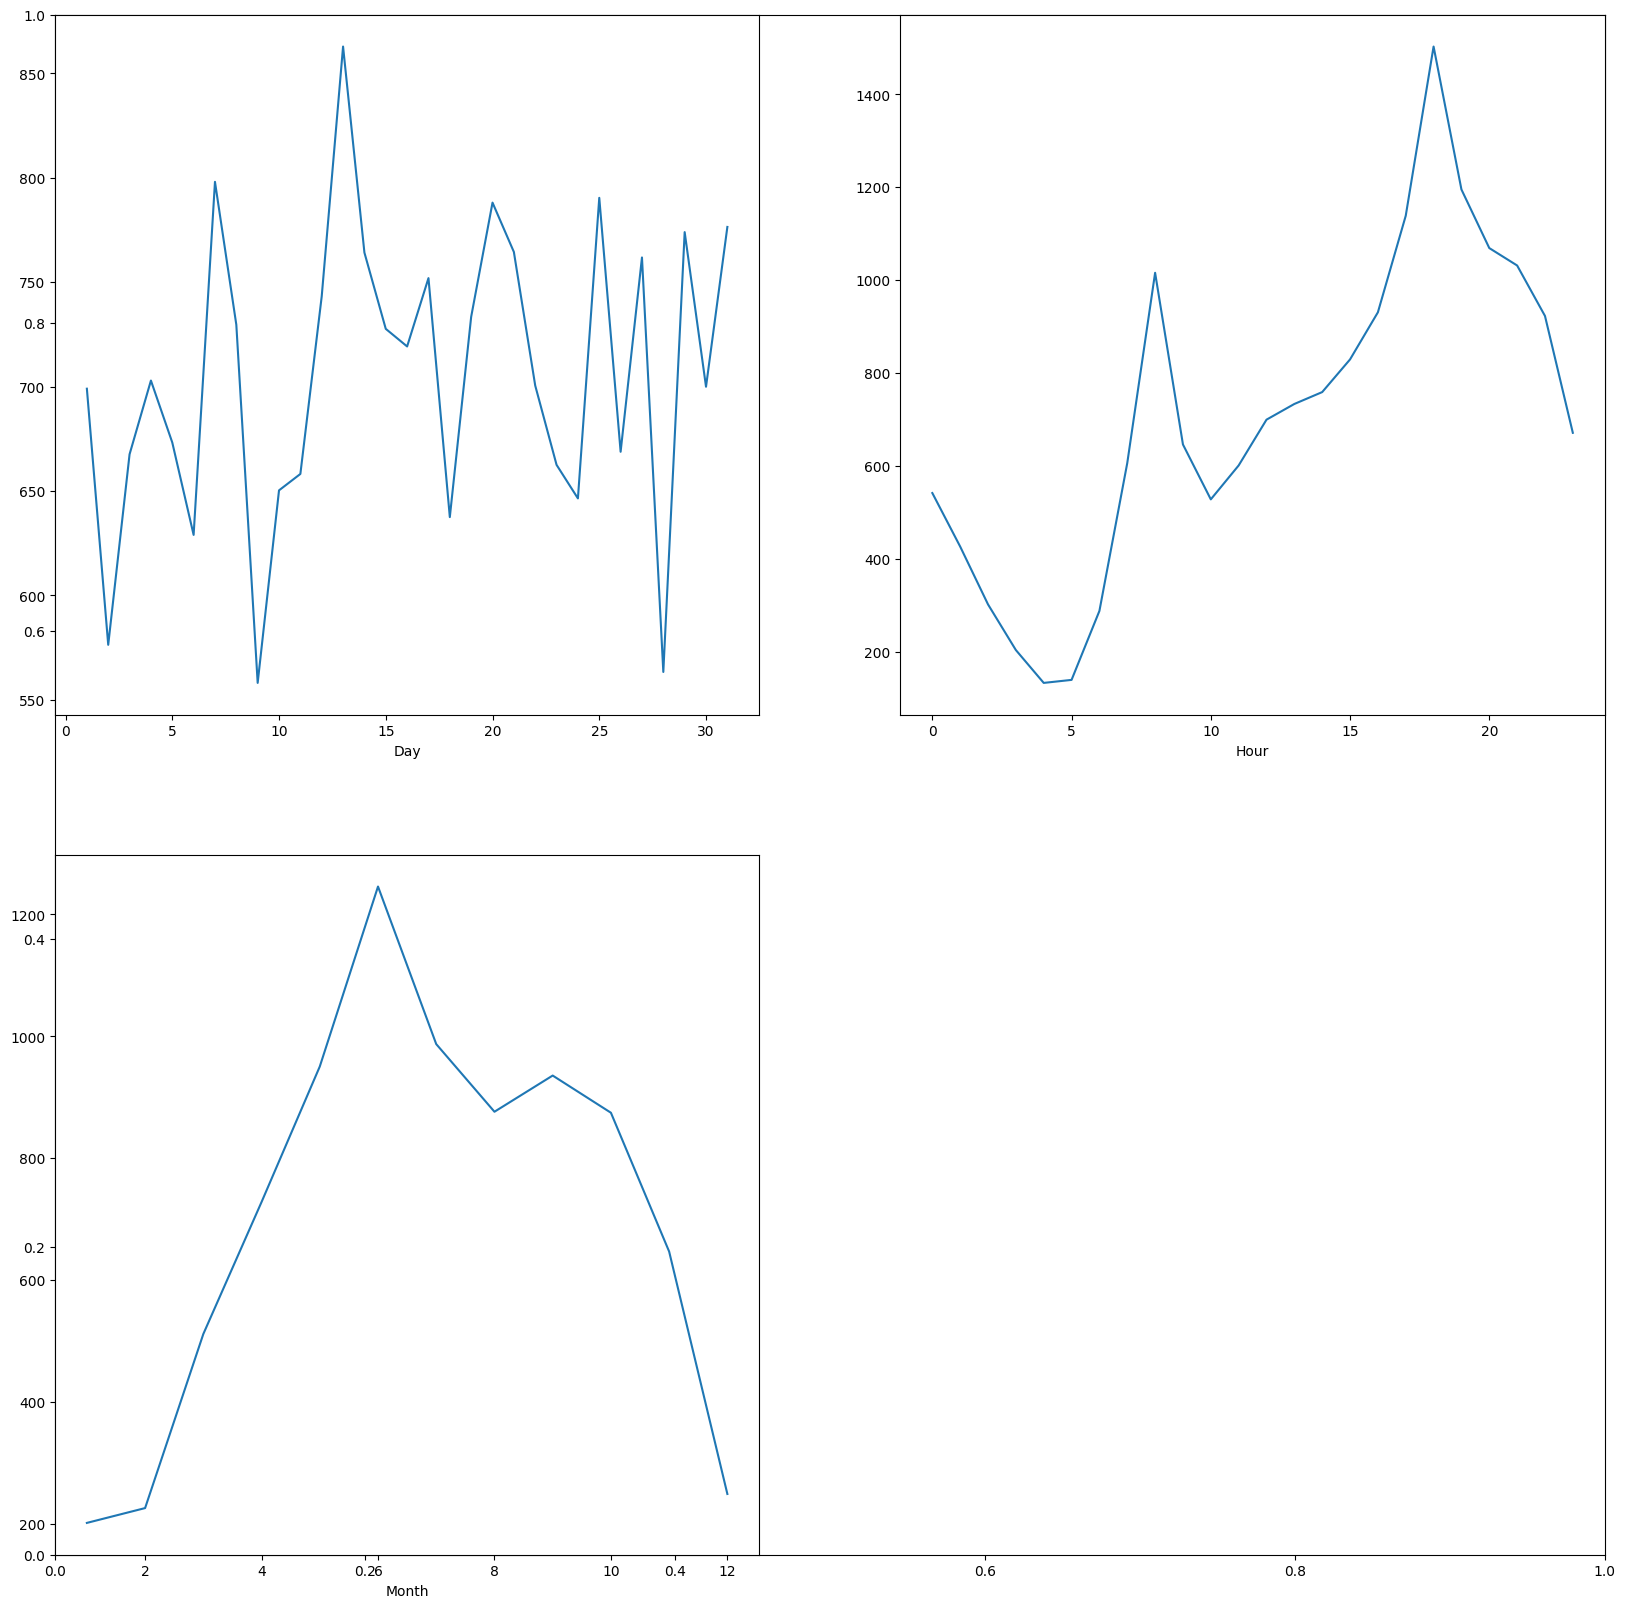

In [16]:
features = ['Day', 'Hour', 'Month'] 

plt.subplots(figsize=(20, 20)) 
for i, col in enumerate(features): 
	plt.subplot(2, 2, i + 1) 
	df.groupby(col).mean()['Rented Bike Count'].plot() 
plt.show()

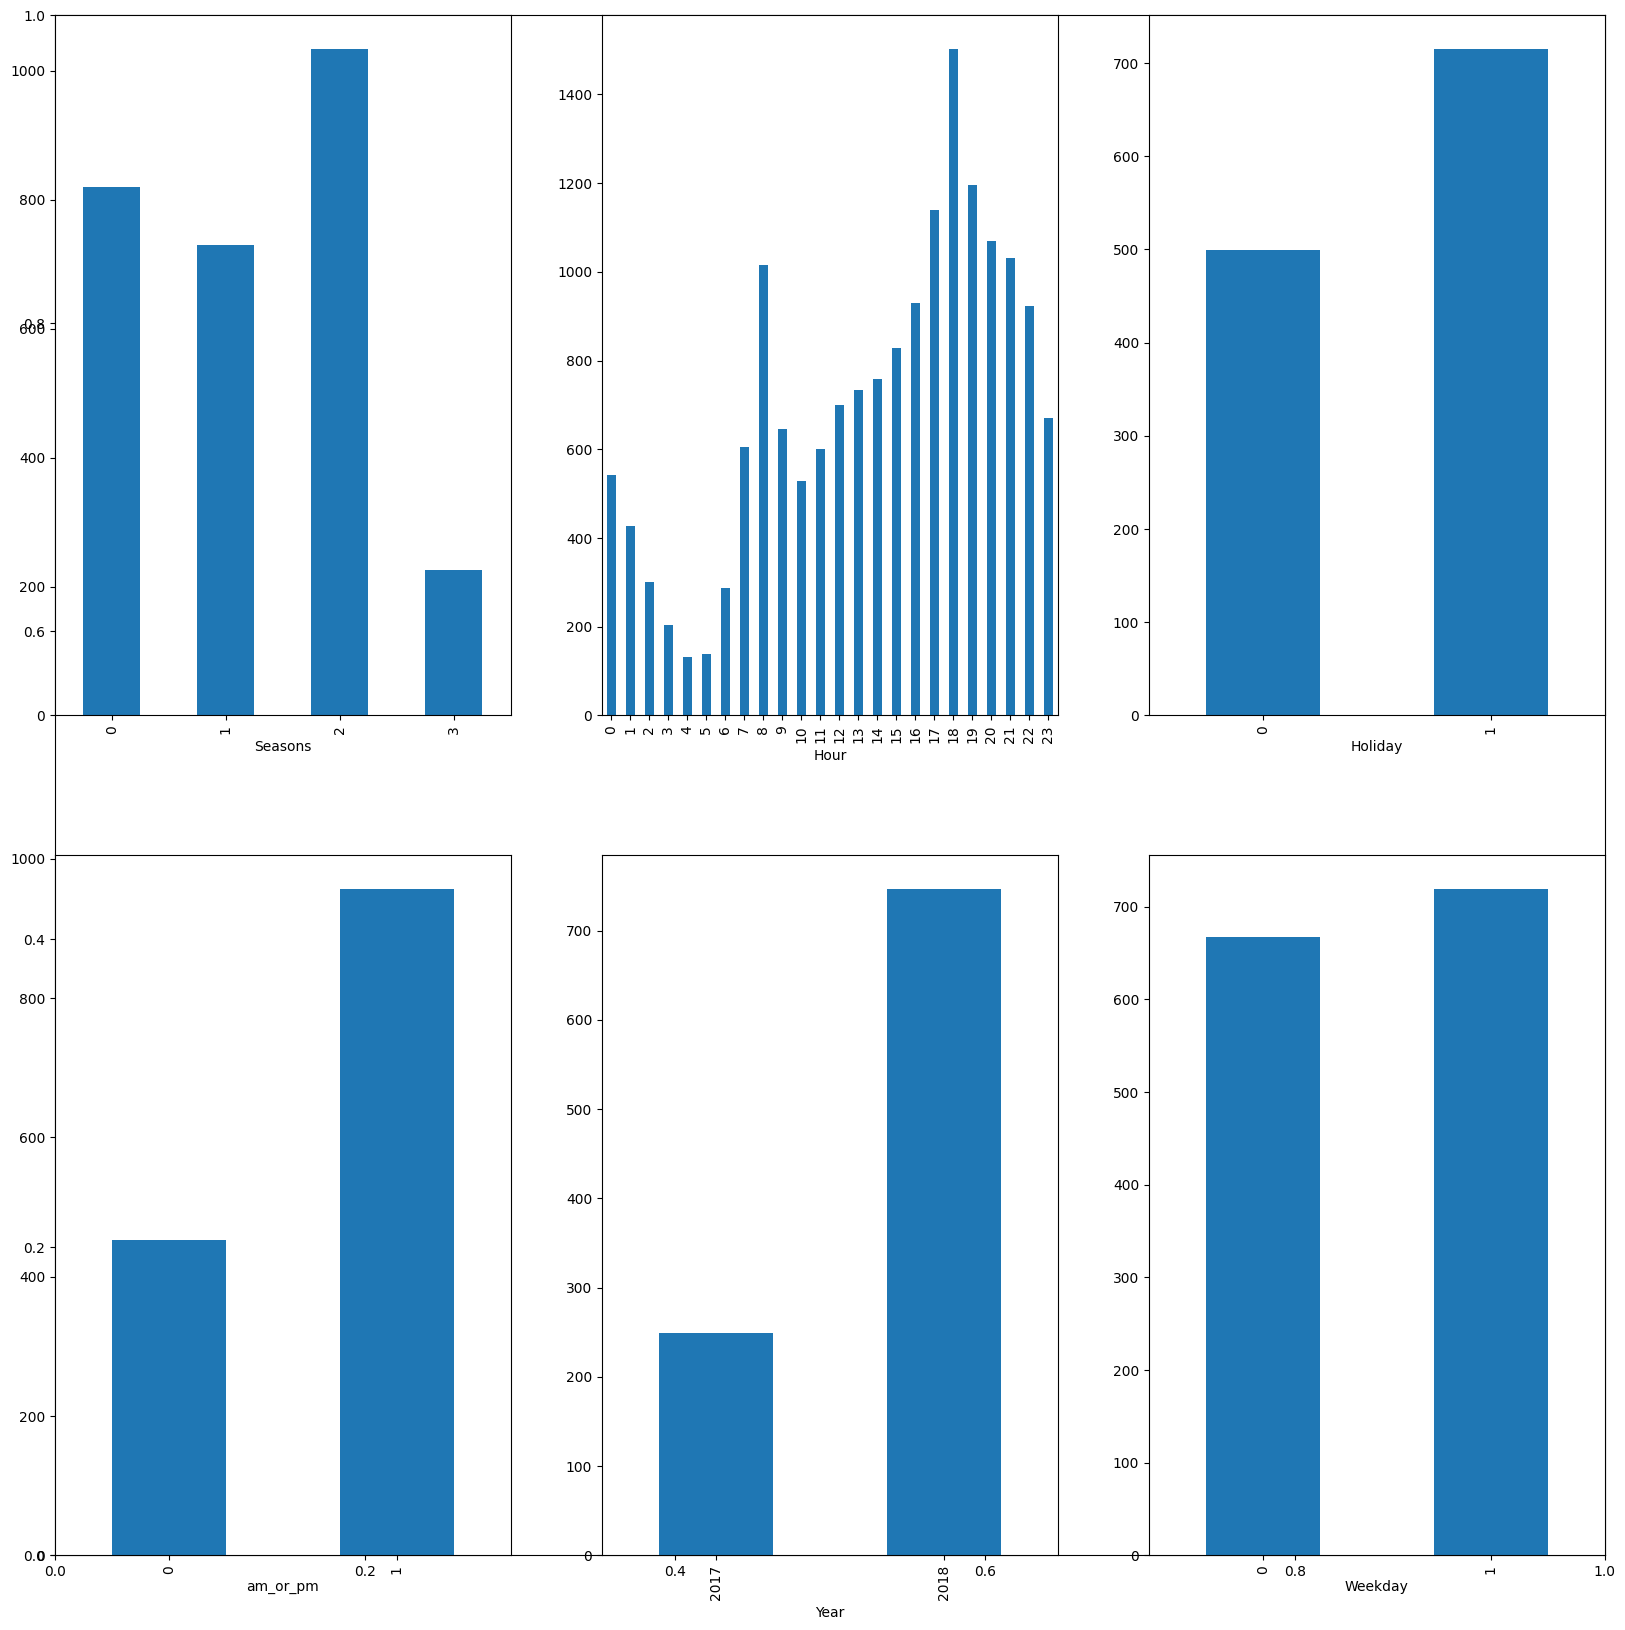

In [17]:
features = ['Seasons', 'Hour', 'Holiday','am_or_pm', 'Year', 'Weekday'] 

plt.subplots(figsize=(20, 20)) 
for i, col in enumerate(features): 
	plt.subplot(2, 3, i + 1) 
	df.groupby(col).mean()['Rented Bike Count'].plot.bar() 
plt.show() 


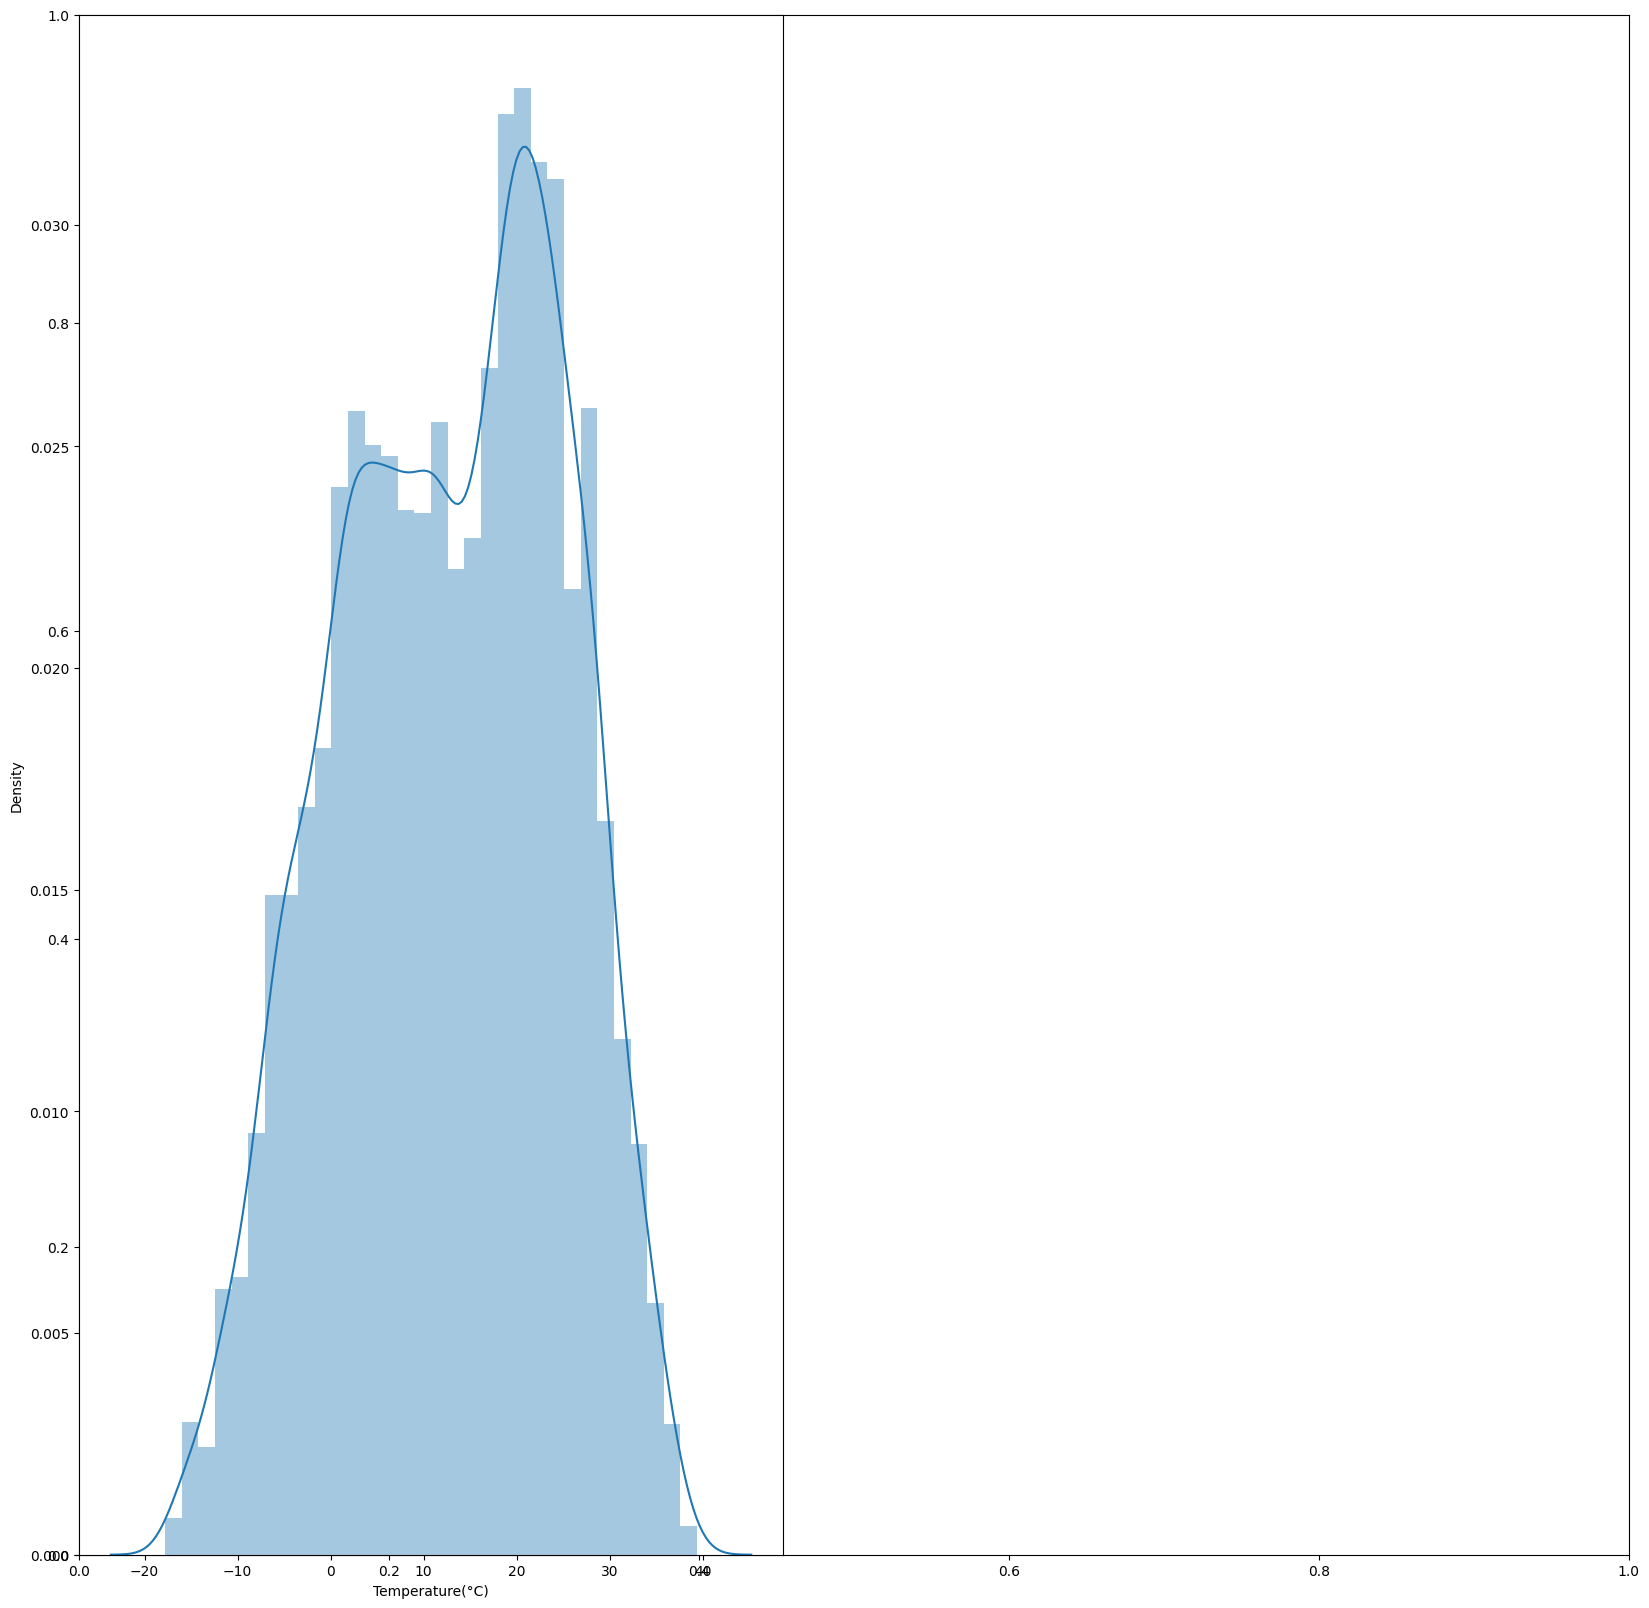

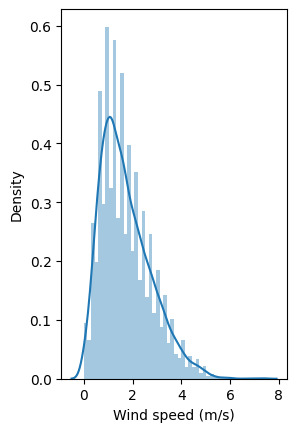

In [18]:
features = ['Temperature(°C)', 'Wind speed (m/s)'] 

plt.subplots(figsize=(20, 20))
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.distplot(df[col]) 
    plt.show()


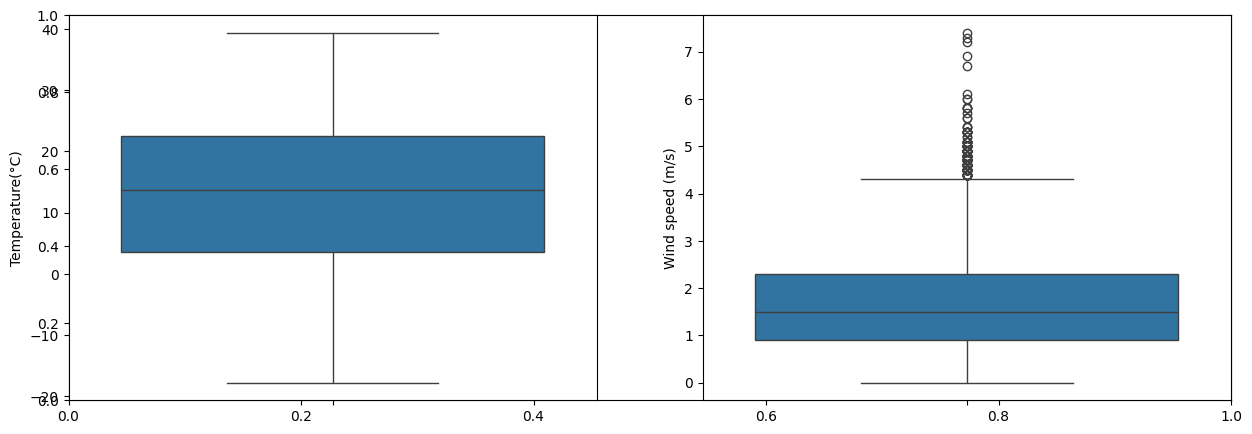

In [19]:

features = ['Temperature(°C)', 'Wind speed (m/s)'] 
  
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
  plt.subplot(1, 2, i + 1) 
  sb.boxplot(df[col]) 
plt.show()

In [20]:
num_rows = df.shape[0] - df[df['Wind speed (m/s)']<=3.2].shape[0] 
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 801.


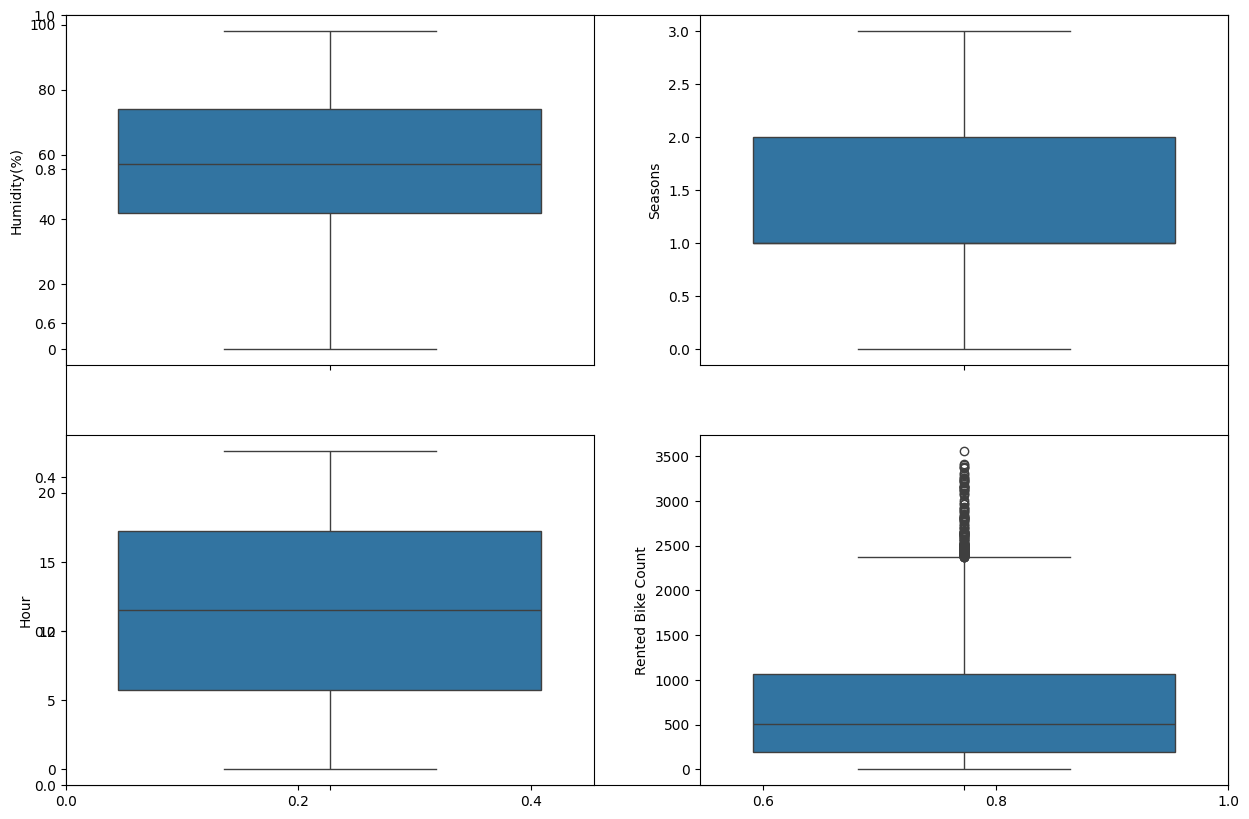

In [21]:
features = ['Humidity(%)', 'Seasons', 'Hour', 'Rented Bike Count'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show() 

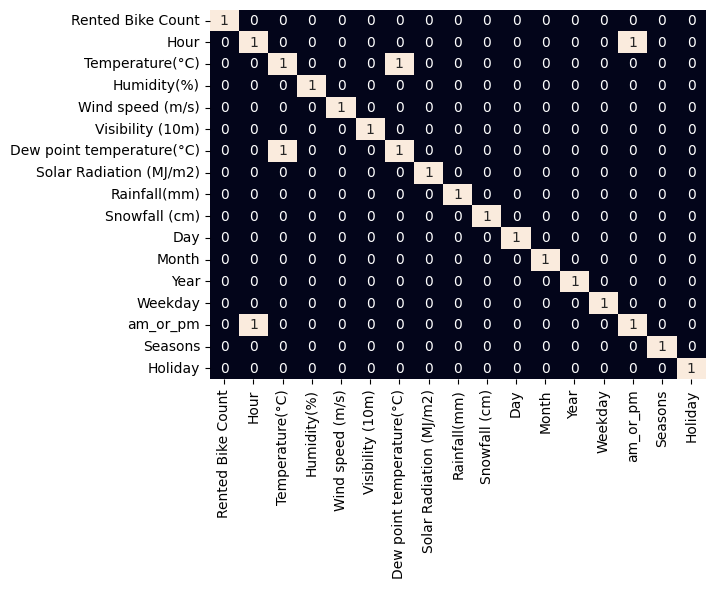

In [22]:
sb.heatmap(df.corr() > 0.8, 
		annot=True, 
		cbar=False) 
plt.show()


In [23]:
df.drop(['Hour'], axis=1, inplace=True)
df.drop(['Day'], axis=1, inplace=True)
df.drop(['Month'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)
df.drop(['am_or_pm'], axis=1, inplace=True)
df = df[(df['Wind speed (m/s)'] <= 3.2) & (df['Humidity(%)'] > 0)]


In [24]:
features = df.drop(['Rented Bike Count'], axis=1) 
target = df['Rented Bike Count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, 
												target, 
												test_size = 0.1, 
												random_state=42) 
X_train.shape, X_val.shape


((7147, 11), (795, 11))

In [25]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 


In [26]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), XGBRegressor(), Lasso(), 
		RandomForestRegressor(), Ridge()] 

for i in range(5): 
	models[i].fit(X_train, Y_train) 

	print(f'{models[i]} : ') 

	train_preds = models[i].predict(X_train) 
	print('Training Error : ', mae(Y_train, train_preds)) 

	val_preds = models[i].predict(X_val) 
	print('Validation Error : ', mae(Y_val, val_preds)) 
	print() 


LinearRegression() : 
Training Error :  366.26161875612996
Validation Error :  351.48962758281664

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  133.94911526282618
Validation Error :  253.79319641125278

Lasso() : 
Training Error :  366.3162558074651
Validation Error :  351.625

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [28]:
def train_my_model():
    lr=LinearRegression().fit(X_train,Y_train)
    print(X_val.shape)
    print(Y_val.shape)
    predictions_linear=lr.predict(X_val)
    plt.scatter(Y_val,predictions_linear,color='blue')
    plt.plot(predictions_linear,predictions_linear,color='red')
    rf=RandomForestRegressor().fit(X_train,Y_train)
    predictions_r=rf.predict(X_val)
    print(r2_score(predictions_r,Y_val))

(795, 11)
(795,)
0.4905323529495583


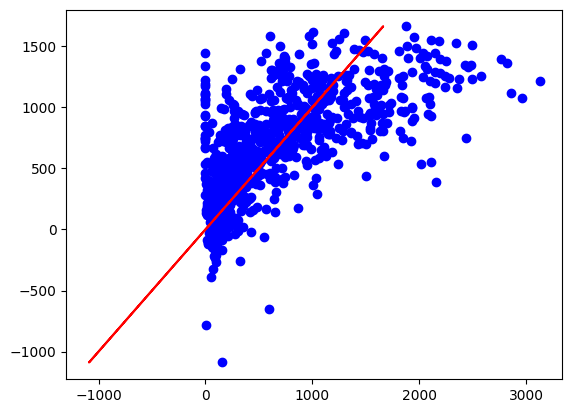

In [29]:
train_my_model()

In [84]:
def predict_my_bike(temp,humi,wind,visi,dew,sola,rain,snow,seas,holi,func,i):
    input_values=(temp,humi,wind,visi,dew,sola,rain,snow,seas,holi,func)
    a=np.asarray(input_values)
    a_reshaped=a.reshape(1,-1)
    return float(models[i].fit(X_train, Y_train).predict(a_reshaped))

    

In [93]:
predict_my_bike(1,2,3,4,5,6,7,8,0,0,0,1)

542.8026123046875

In [86]:
import gradio as gr
app=gr.Interface(fn=predict_my_bike,inputs=[gr.Number(label="Enter temperature in degrees between "+str(df['Temperature(°C)'].min())+" and "+str(df['Temperature(°C)'].max())),gr.Number(label="Enter humidity in percentage between "+str(df['Humidity(%)'].min())+" and "+str(df['Humidity(%)'].max())),gr.Number(label="Enter windspeed in m/s between "+str(df['Wind speed (m/s)'].min())+" and "+str(df['Wind speed (m/s)'].max())),gr.Number(label="Enter visibility(10m) between "+str(df['Visibility (10m)'].min())+" and "+str(df['Visibility (10m)'].max())),gr.Number(label="Enter dewpoint temperature in degrees between "+str(df['Dew point temperature(°C)'].min())+" and "+str(df['Dew point temperature(°C)'].max())),gr.Number(label="Enter solar radiation(mj/m2) between "+str(df['Solar Radiation (MJ/m2)'].min())+" and "+str(df['Solar Radiation (MJ/m2)'].max())),gr.Number(label="Enter rainfall in mm between "+str(df['Rainfall(mm)'].min())+" and "+str(df['Rainfall(mm)'].max())),gr.Number(label="Enter snowfall in cm between "+str(df['Snowfall (cm)'].min())+" and "+str(df['Snowfall (cm)'].max())),gr.Dropdown(label="Select present season",choices=(("Winter",0),("Spring",1),("Summer",2),("Autumn",3))),gr.Dropdown(label="Select status of today",choices=(("Holiday",1),("No Holiday",0))),gr.Dropdown(label="Select functioning status of company",choices=(("Yes",1),("No",0))),gr.Dropdown(label="Select classifying function ",choices=(("LinearRegression",0), ("XGBRegressor",1), ("Lasso",2), 
("RandomForestRegressor",3),("Ridge",4)))],outputs=gr.Number(label="bikes count"),title="BIKE COUNT PREDICTION",theme=gr.themes.Monochrome())

In [87]:
app.launch()

Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.
